In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [16]:

# Directory containing files (update this if running locally)
data_directory = "/Users/evan/MIT/c85/FP1/productDownload_2025-03-17T223349"  # Update path as needed

# Find all relevant files
files = [f for f in os.listdir(data_directory) if f.endswith("-Data.csv")]



# Define the age-related column names
age_columns = ["S1903_C01_012E", "S1903_C01_013E", "S1903_C01_014E"]
age_labels = ["Age 25-44", "Age 45-64", "Age 65+"]

# Dictionary to store age data for each year
df_dict = {}
year_list = []
pop_data = {label: [] for label in age_labels}

for file in files:
    year = file.split("Y")[1][:4]  # Extract year from filename
    #print(year)
    
    file_path = os.path.join(data_directory, file)
    
    df = pd.read_csv(file_path)
    

    # Extract and convert age data to numeric format
    age_data = df[age_columns].iloc[1].astype(float)
    #print(age_data)

    df_dict[int(year)] = age_data.to_dict()
    year_list.append(int(year))

    #for label, value in zip(age_labels, age_data):
    #    pop_data[label].append(value)


# Sorting years for consistency
sorted_years = sorted(year_list)



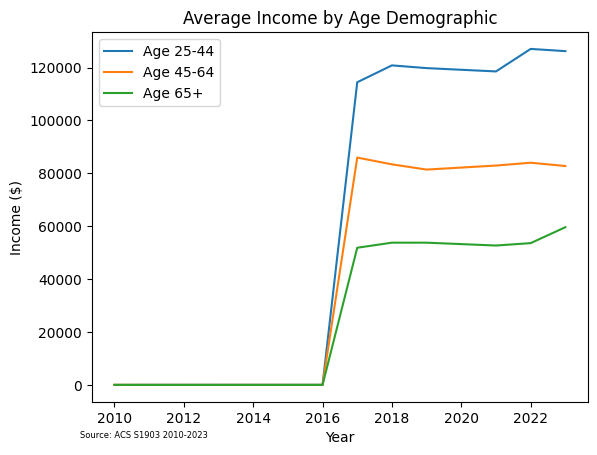

In [24]:
#df_dict[2021]['S2502_C01_011E']
#len(df_dict)
age1 = []
age2 = []
age3 = []


for i in range(len(df_dict)):
    temp_year = sorted_years[i]
    temp_dict = df_dict[temp_year]
    age1.append(temp_dict[age_columns[0]])
    age2.append(temp_dict[age_columns[1]])
    age3.append(temp_dict[age_columns[2]])


plt.plot(sorted_years,age1,label = age_labels[0])
plt.plot(sorted_years,age2,label = age_labels[1])
plt.plot(sorted_years,age3,label = age_labels[2])
plt.xlabel('Year')
plt.ylabel("Income ($)")
plt.text(2009, -20000, "Source: ACS S1903 2010-2023", fontsize=6)
plt.title("Average Income by Age Demographic")
plt.legend()
plt.show()


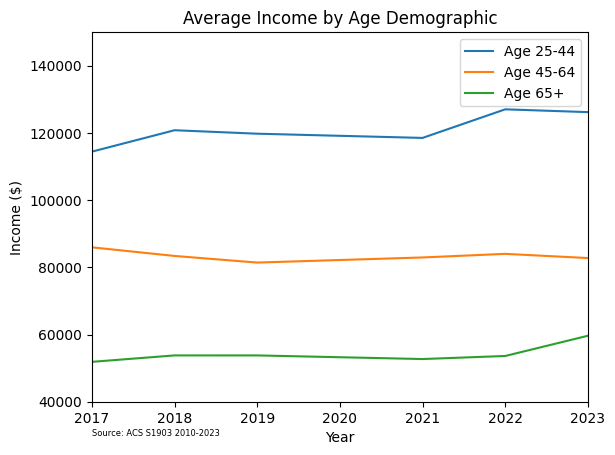

In [23]:
plt.plot(sorted_years,age1,label = age_labels[0])
plt.plot(sorted_years,age2,label = age_labels[1])
plt.plot(sorted_years,age3,label = age_labels[2])
plt.xlabel('Year')
plt.ylabel("Income ($)")
plt.xlim([2017,2023])
plt.ylim([40000,150000])
plt.text(2017, 30000, "Source: ACS S1903 2010-2023", fontsize=6)
plt.title("Average Income by Age Demographic")
plt.legend()
plt.show()